In [81]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import matplotlib.pyplot as plt
import numpy as np
import random


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [434]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [8]:
x_train = mnist.train.images

In [10]:
from sklearn.decomposition import PCA


pca = PCA(n_components=784)
pca.fit_transform(x_train)

array([[ 7.2482401e-01,  2.4329047e+00, -1.5374106e+00, ...,
        -0.0000000e+00, -0.0000000e+00, -0.0000000e+00],
       [ 4.7294080e-01, -1.0051752e+00, -5.0122166e-01, ...,
        -7.0986675e-07, -4.3191514e-07, -7.1996431e-07],
       [-9.3884930e-02,  3.0102613e+00, -2.1284797e+00, ...,
        -1.0748366e-06, -2.8308864e-07, -3.0792671e-07],
       ...,
       [-7.1024913e-01,  6.6501564e-01, -1.0130402e+00, ...,
        -1.3436209e-09,  1.2442896e-09,  1.5803118e-09],
       [ 4.9953094e-01, -2.6789453e-02,  2.0011733e+00, ...,
         6.1072442e-10, -1.3615560e-09,  2.5354241e-10],
       [-6.6692483e-01, -8.4333621e-02,  2.1835463e+00, ...,
         2.3107243e-09, -1.8314378e-09,  8.0214119e-10]], dtype=float32)

In [75]:
data = x_train
data -= data.mean(axis = 0 )
cov = np.cov(data,rowvar=False)
evals , evecs = np.linalg.eigh(cov)

idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
evals = evals[idx]

a = np.dot(data, evecs) 

In [59]:
inv = (np.dot(b,np.linalg.inv(evecs))) + x_train.mean(axis = 0 )

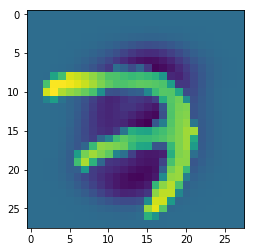

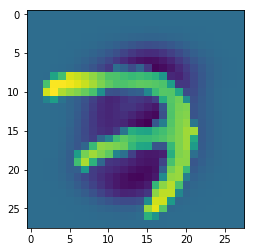

In [60]:
img1 = x_train[0].reshape([28,28])
plt.imshow(img1)
plt.show()

img2 = inv[0].reshape([28,28])
plt.imshow(img2)
plt.show()

In [61]:
b = np.dot(x_train, evecs)
m = x_train.mean(axis = 0 )
mv = np.dot(m,evecs)
biais = np.array(mv,dtype="float32")
poids = np.array(evecs,dtype="float32")

In [264]:
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, 784])

initializer = tf.contrib.layers.xavier_initializer()

W1 = tf.Variable(poids)
b1 = tf.Variable(biais)

y1 = tf.nn.relu(tf.matmul(x,W1) + b1)

W2 = tf.Variable(initializer([784,10]))
b2 = tf.Variable(initializer([10]))

y = tf.nn.softmax(tf.matmul(y1,W2) + b2)

y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

sess.run(tf.initialize_all_variables())
#If using TensorFlow prior to 0.12 use:

LEARNING_RATE = 0.1

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [266]:
acs = []
losses = []

x_train,y_train = mnist.train.next_batch(10000)
x_test,y_test = mnist.test.next_batch(10000)

for i in range(50):
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    ac = sess.run(accuracy, feed_dict={x: x_test, y_: y_test})
    loss = sess.run(cross_entropy, {x: x_train, y_: y_train})
    losses.append(loss)
    acs.append(ac)
    if(i %1 == 0):
        print('Loss = ' + str(loss))
        print('  Accuracy =  ' + str(ac))
        
sess.close()

Loss = 0.98605144
  Accuracy =  0.8155
Loss = 0.9571576
  Accuracy =  0.8194
Loss = 0.93043214
  Accuracy =  0.8219
Loss = 0.9056082
  Accuracy =  0.8241
Loss = 0.88261795
  Accuracy =  0.8268
Loss = 0.86122775
  Accuracy =  0.8304
Loss = 0.84128135
  Accuracy =  0.8335
Loss = 0.82266164
  Accuracy =  0.8359
Loss = 0.80521715
  Accuracy =  0.8382
Loss = 0.78884727
  Accuracy =  0.8405
Loss = 0.7734941
  Accuracy =  0.8425
Loss = 0.7590524
  Accuracy =  0.845
Loss = 0.74544317
  Accuracy =  0.8471
Loss = 0.73259854
  Accuracy =  0.8492
Loss = 0.720457
  Accuracy =  0.85
Loss = 0.70895797
  Accuracy =  0.8514
Loss = 0.69804835
  Accuracy =  0.8527
Loss = 0.6876776
  Accuracy =  0.8545
Loss = 0.6778153
  Accuracy =  0.8554
Loss = 0.66842383
  Accuracy =  0.8576
Loss = 0.659473
  Accuracy =  0.8589
Loss = 0.65093136
  Accuracy =  0.8599
Loss = 0.6427683
  Accuracy =  0.8611
Loss = 0.6349594
  Accuracy =  0.862
Loss = 0.6274826
  Accuracy =  0.8628
Loss = 0.62031573
  Accuracy =  0.864
Loss

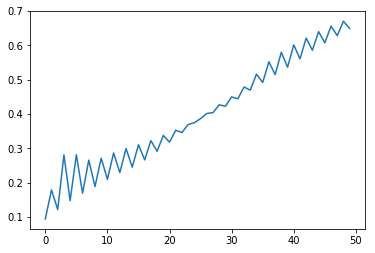

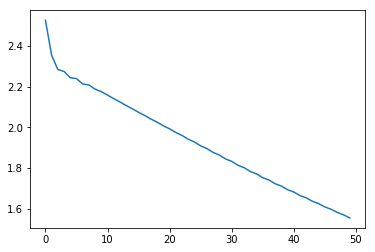

In [492]:
plt.plot(acs)
plt.show()

plt.plot(losses)
plt.show()

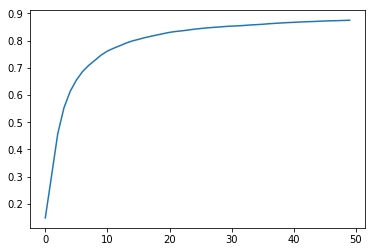

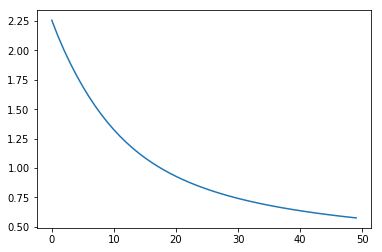

In [485]:
plt.plot(acs)
plt.show()

plt.plot(losses)
plt.show()

# AUTO ENCODER

In [267]:
sess.close()

sess = tf.Session()

learning_rate = 0.01

initializer = tf.contrib.layers.xavier_initializer()


X = tf.placeholder(tf.float32, shape=[None, 784])

# encoder 
w1 = tf.Variable(initializer([784, 256]))
b1 = tf.Variable(initializer([256]))

layer_1 = tf.nn.relu(tf.add(tf.matmul(X, w1),b1))

w2 = tf.Variable(initializer([256, 100]))
b2 = tf.Variable(initializer([100]))

layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, w2),b2))

# decoder 

w3 = tf.Variable(initializer([100, 256]))
b3 = tf.Variable(initializer([256]))

layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, w3),b3))

w4 = tf.Variable(initializer([256, 784]))
b4 = tf.Variable(initializer([784]))

y_pred = tf.nn.relu(tf.add(tf.matmul(layer_3, w4),b4))

y_true = X

loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [268]:
for i in range(1000):
    
    x_train,_ =  mnist.train.next_batch(1000)
    sess.run(optimizer,feed_dict={X : x_train})
    
    if (i %100 == 0):
        
        print(sess.run(loss,feed_dict={X : x_train}))

0.105436444
0.07808363
0.052882507
0.035168257
0.03338645
0.025344644
0.024977813
0.023481026
0.0220956
0.022215158


In [269]:
test_size = 5

x_test,_ = mnist.test.next_batch(test_size)
print(sess.run(loss,feed_dict={X : x_test}))
fitted = sess.run(y_pred,feed_dict={X : x_test})
test = x_test.reshape([test_size,28,28])
fitted = fitted.reshape([test_size,28,28])

0.01743398


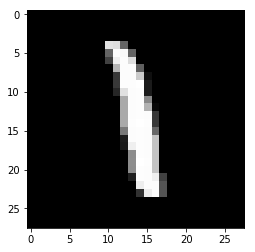

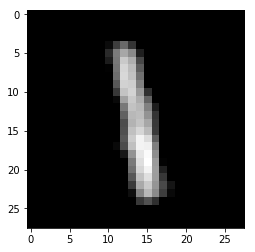

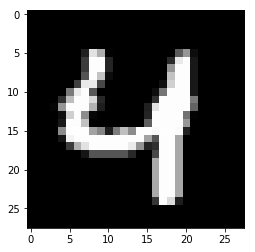

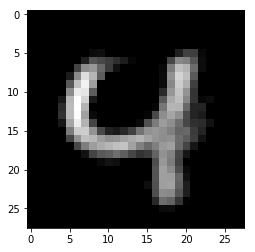

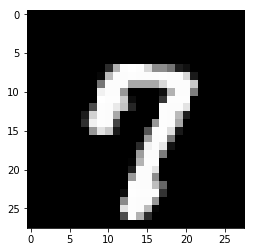

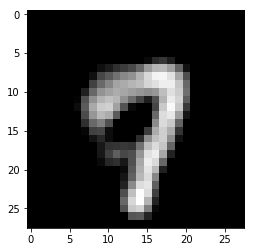

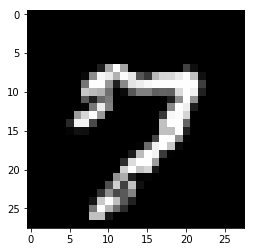

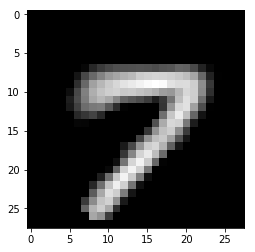

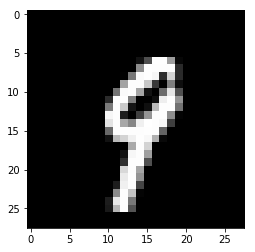

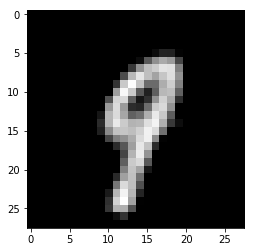

In [270]:
for i in range(test_size):
    
    d = test[i]
    plt.imshow(d,cmap = "gray")
    plt.show()
    d = fitted[i]
    plt.imshow(d,cmap = "gray")
    plt.show()
    

### Neural network intialized with autoencoder

In [92]:

sess = tf.Session()

initializer = tf.contrib.layers.xavier_initializer()

# LAYER 1

Xe = tf.placeholder(tf.float32, shape=[None, 784])

we1 = tf.Variable(initializer([784, 256]))
be1 = tf.Variable(initializer([256]))

output_1 = tf.nn.relu(tf.add(tf.matmul(Xe, we1),be1)) 

we2 = tf.Variable(initializer([256, 100]))
be2 = tf.Variable(initializer([100]))

output_2 = tf.nn.relu(tf.add(tf.matmul(output_1, we2),be2))

we3 = tf.Variable(initializer([100, 10]))
be3 = tf.Variable(initializer([10]))

output_pred = tf.nn.softmax(tf.add(tf.matmul(output_2, we3),be3))

output_true = tf.placeholder(tf.float32, shape=[None, 10])

# LAYER 2

cross_entropy = -tf.reduce_mean(tf.reduce_sum(output_true * tf.log(output_pred)
                         + (1 - output_true) * tf.log(1 - output_pred), axis=1))

correct_prediction = tf.equal(tf.argmax(output_true, 1), tf.argmax(output_pred, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

train = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

init = tf.global_variables_initializer()
sess.run(init)


In [94]:
acs = []
losses = []
tests = []

x_train,y_true = mnist.train.next_batch(10000)

for i in range(100):
    
    x_test,y_test = mnist.test.next_batch(1000)
            
    sess.run(train,feed_dict= {Xe : x_train, output_true : y_true})
    
    ac = sess.run(accuracy, feed_dict= {Xe : x_train, output_true : y_true})
    acs.append(ac)
    e = sess.run(cross_entropy, feed_dict= {Xe : x_train, output_true : y_true})
    losses.append(e)
    t = sess.run(accuracy, feed_dict= {Xe : x_test, output_true : y_test}) 
    tests.append(t)
    if(i % 10 == 0 ):
        print("epoch : ", i)
        
        sess.run(train, feed_dict= {Xe : x_train, output_true : y_true})
        print("accuracy : ", ac)
        print("loss : ", e)
        print("test :", t)
        print()
        
        
plt.plot(acs)
plt.show()
plt.plot(losses)
plt.show()
plt.plot(tests)
plt.show()

epoch :  0
accuracy :  0.208
loss :  3.1864545
test : 0.222

epoch :  10
accuracy :  0.3553
loss :  3.1029344
test : 0.354

epoch :  20
accuracy :  0.4113
loss :  3.026946
test : 0.412

epoch :  30
accuracy :  0.4449
loss :  2.9523888
test : 0.46



KeyboardInterrupt: 

In [326]:
acs2 = acs
losses2 = losses
tests2 = tests

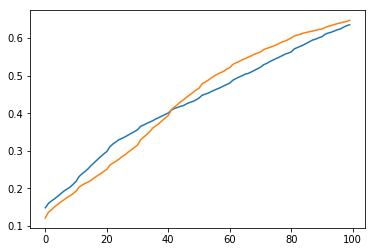

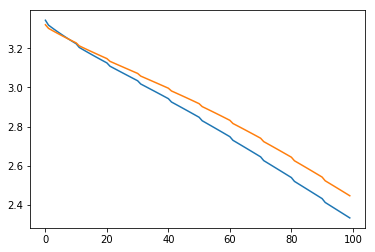

In [329]:
plt.plot(acs1)
plt.plot(acs2)
plt.show()

plt.plot(losses1)
plt.plot(losses2)
plt.show()

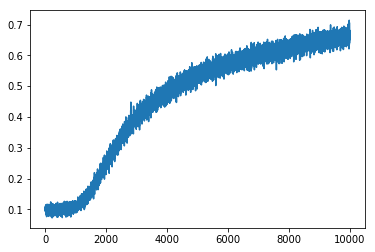

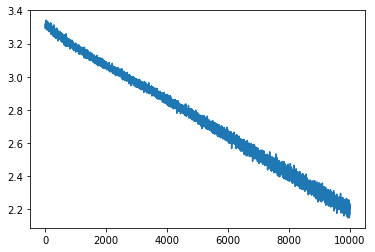

In [22]:
plt.plot(acs)
plt.show()

plt.plot(losses)
plt.show()

In [23]:
x_test,y_test = mnist.test.next_batch(10000)
ac = sess.run(accuracy, feed_dict= {Xe : x_test, output_true : y_test})
print("accuracy : ", ac)

accuracy :  0.6662


# RBM